In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()

In [3]:
fb_data = pd.read_csv('Facebook_Marketplace_data.csv',index_col= 'status_id')
fb_data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


<AxesSubplot: title={'center': 'number of reactions on post over time'}, xlabel='Time', ylabel='Reactions'>

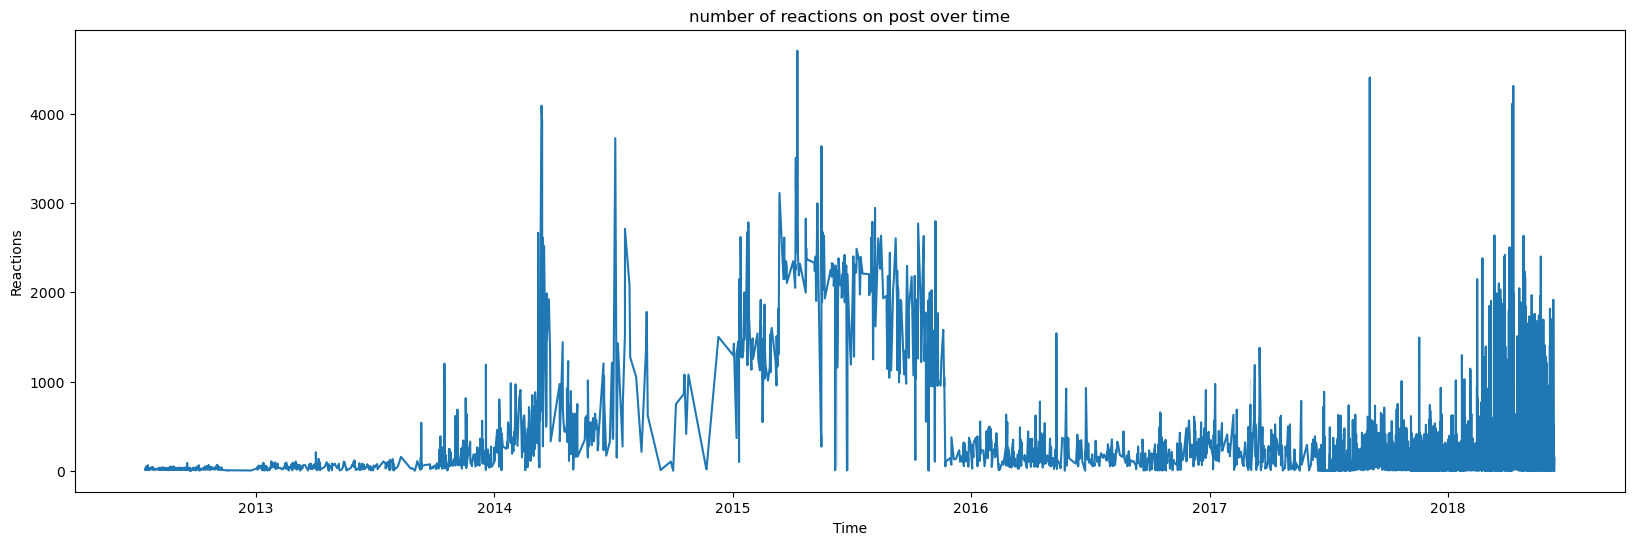

In [4]:
fb_data['status_published'] = pd.to_datetime(fb_data.status_published)
plt.figure(figsize=(20,6))
plt.title('number of reactions on post over time')
plt.ylabel('Reactions')
plt.xlabel('Time')
sns.lineplot(x = 'status_published',y = 'num_reactions' ,data = fb_data)

<AxesSubplot: xlabel='num_reactions', ylabel='num_comments'>

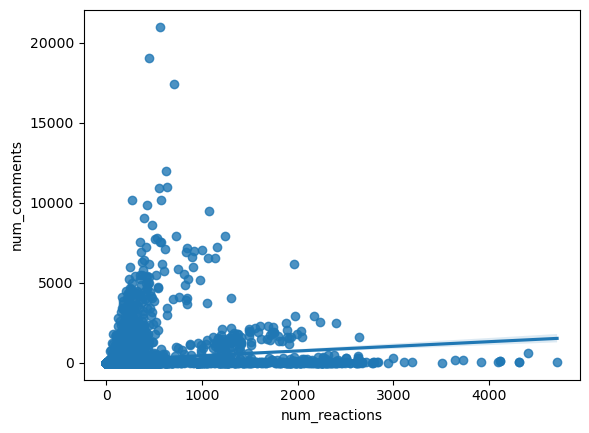

In [8]:
sns.regplot(x= 'num_reactions', y = 'num_comments',data = fb_data)


<AxesSubplot: xlabel='num_reactions', ylabel='num_shares'>

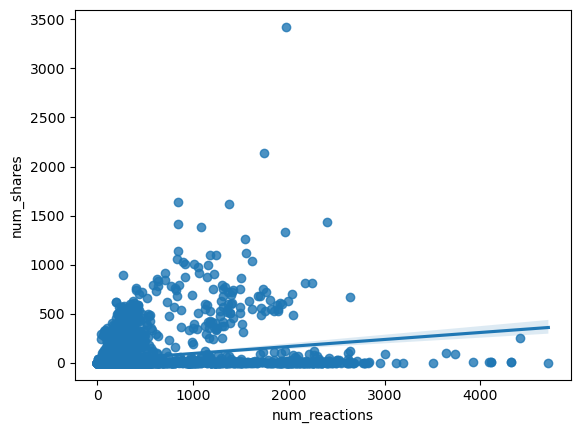

In [9]:
sns.regplot(x= 'num_reactions', y = 'num_shares',data = fb_data)


In [5]:
train_data = fb_data.drop(columns=['Column1','Column2','Column3','Column4','status_published'])

In [ ]:
# sns.jointplot(x= 'num_reactions', y = 'num_comments',data = train_data,kind ='kde',fill = True)

As we can see there is no strong corelation but we can say there is a pattern if num_reacctions is close to 0 then there is high number of commnets on it 

  
## OneHotEncoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)
encoded_cols = pd.DataFrame(OH_encoder.fit_transform(train_data[['status_type']]))
encoded_cols.index = train_data.index
train_data.drop(columns=['status_type'],inplace=True)
train_data = pd.concat([train_data,encoded_cols],axis = 1)
train_data.columns = train_data.columns.astype('str')

# Ordianl Encoding 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
Ord_encoder = OrdinalEncoder()
train_data[['status_type']] = Ord_encoder.fit_transform(train_data[['status_type']])
train_data['status_type'].unique()

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data.iloc[:,:9] = sc.fit_transform(train_data.iloc[:,:9])

## Getting the Optimal cluster Number BY Elbow Method

<AxesSubplot: title={'center': 'WCSS vs No_of_Clusters'}, xlabel='No_of_Clusters', ylabel='WCSS'>

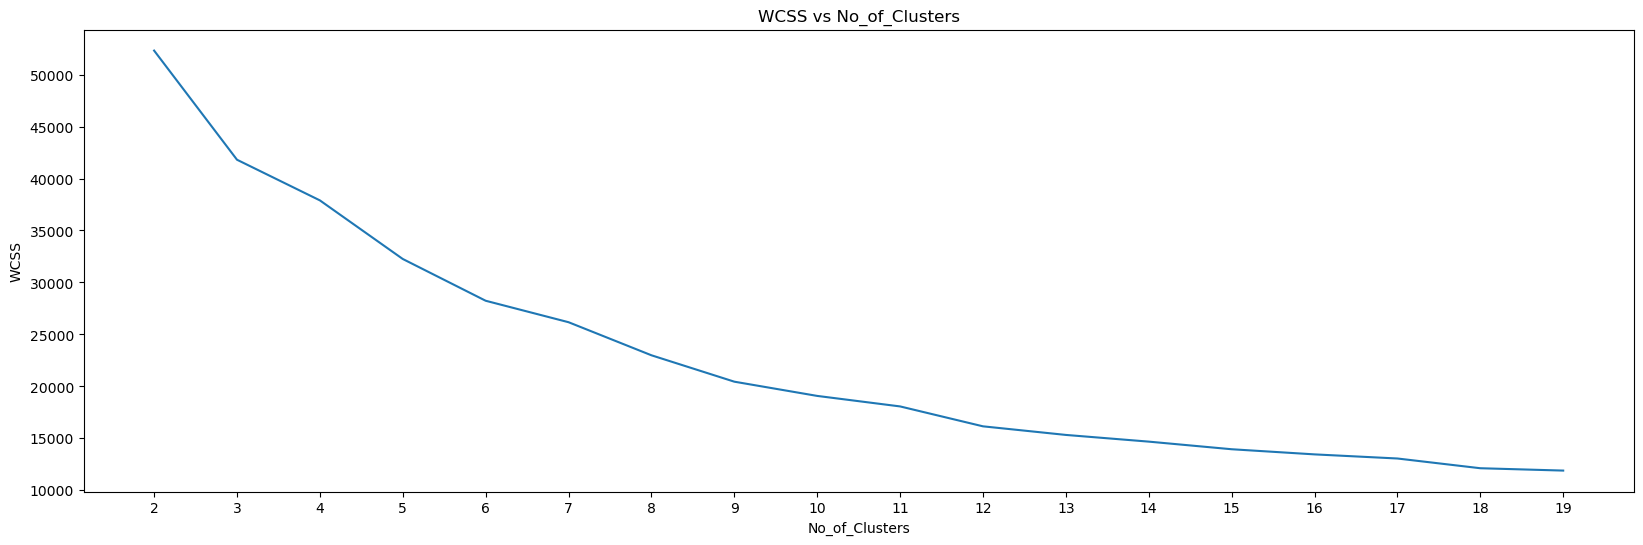

In [8]:
from sklearn.cluster import KMeans

def get_WCSS(n_clusters):
    model = KMeans(n_clusters=n_clusters,init='k-means++',random_state=37)
    model.fit(train_data)
    return model.inertia_
plt.figure(figsize=(20,6))
plt.title('WCSS vs No_of_Clusters')
plt.xlabel('No_of_Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2,20))
sns.lineplot(y=[get_WCSS(i) for i in range(2,20)],x =[i for i in range(2,20)])


As we can see from elbow method we get optimal value as 12 or 9 for cluster number

In [9]:
optimal_cluster = 3
model = KMeans(n_clusters=optimal_cluster,init='k-means++',random_state=37)
model.fit(train_data)
labels = model.predict(train_data)
labels = pd.Series(labels,index=fb_data.index)
pred_data = fb_data.copy()
pred_data['cluster'] = labels
pred_data

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
status_id,,,,,,,,,,,,,,,,
1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,0
2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,0
3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,0
4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,0
5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN,0
7047,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN,0
7048,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,0


In [10]:
pred_data.groupby('cluster').aggregate({
    'num_reactions':'mean',
    'num_shares':'mean',
    'num_comments':'mean'})

,num_reactions,num_shares,num_comments
cluster,,,
0,111.352803,21.682744,106.369558
1,1778.772959,11.224490,59.025510
2,786.573529,512.106618,3232.705882


# **DATA INSIGHTS**

<AxesSubplot: xlabel='num_reactions', ylabel='num_shares'>

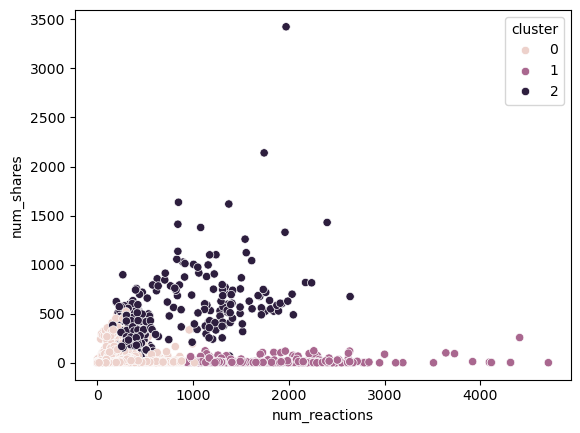

In [12]:
sns.scatterplot(x = 'num_reactions',y = 'num_shares',data = pred_data,hue = 'cluster')

<AxesSubplot: xlabel='num_reactions', ylabel='num_shares'>

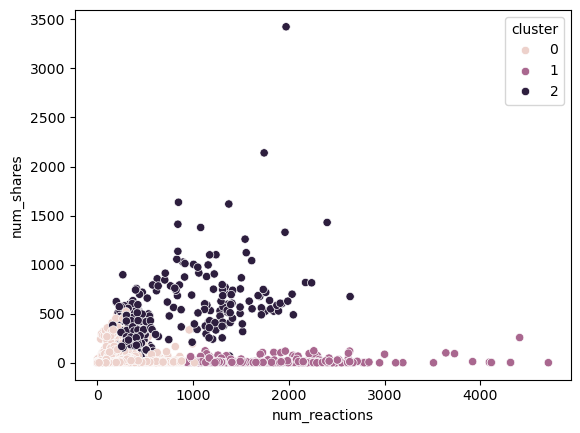

In [13]:
sns.scatterplot(x = 'num_reactions',y = 'num_shares',data = pred_data,hue = 'cluster')

<AxesSubplot: xlabel='status_published', ylabel='num_reactions'>

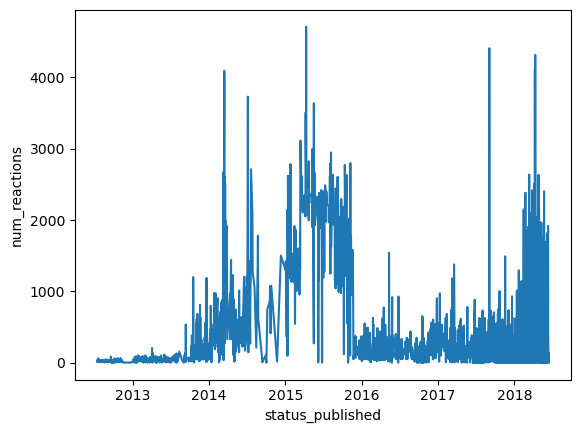

In [16]:
sns.lineplot(y='num_reactions',x='status_published',data = fb_data)


<AxesSubplot: xlabel='status_published', ylabel='num_comments'>

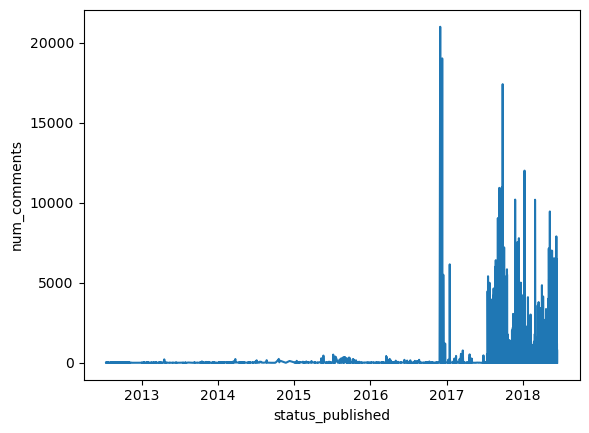

In [17]:
sns.lineplot(y='num_comments',x='status_published',data = fb_data)


<AxesSubplot: xlabel='status_published', ylabel='num_shares'>

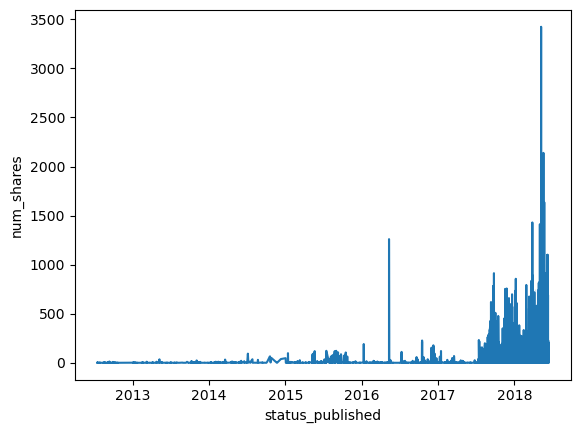

In [18]:
sns.lineplot(y='num_shares',x='status_published',data = fb_data)

<AxesSubplot: xlabel='status_published', ylabel='None'>

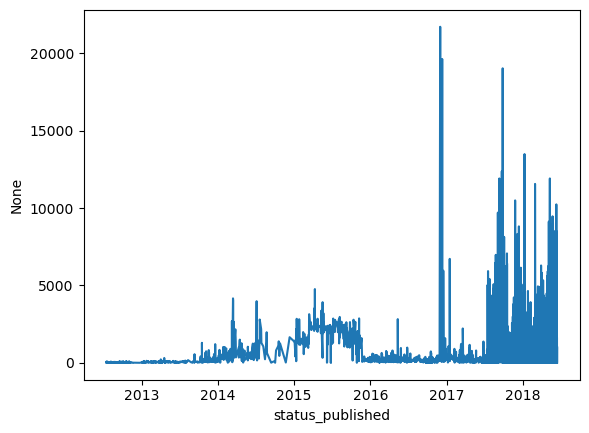

In [51]:
sns.lineplot(y=fb_data.num_reactions + fb_data.num_comments + fb_data.num_shares,x=fb_data.status_published)

In [33]:
plt_data = fb_data.groupby('status_type').aggregate({
    'num_reactions':['mean'],
    'num_comments':['mean'],
    'num_shares':['mean']
})
plt_data

,num_reactions,num_comments,num_shares
,mean,mean,mean
status_type,,,
link,370.142857,5.698413,4.396825
photo,181.290345,15.993470,2.553871
status,438.783562,36.238356,2.558904
video,283.409597,642.478149,115.679949


In [44]:
plt_data.columns

MultiIndex([('num_reactions', 'mean'),
            ( 'num_comments', 'mean'),
            (   'num_shares', 'mean')],
           )

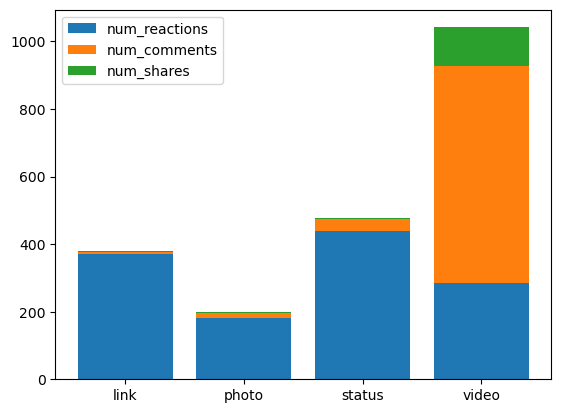

<Figure size 1400x2000 with 0 Axes>

In [54]:
plt.bar(plt_data.index,plt_data.num_reactions.loc[:,'mean'])
plt.bar(plt_data.index,plt_data.num_comments.loc[:,'mean'],bottom=plt_data.num_reactions.loc[:,'mean'])
plt.bar(plt_data.index,plt_data.num_shares.loc[:,'mean'],bottom=plt_data.num_reactions.loc[:,'mean']+plt_data.num_comments.loc[:,'mean'])
plt.legend(labels=['num_reactions','num_comments','num_shares'])
plt.yticks(50)
plt.show()
